In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
import multiprocessing

In [2]:
df = pd.read_csv("/home/bh_parijat/data/master_mapped_data.csv")

In [3]:
print(df.shape)

(4791859, 22)


In [4]:
print(df.columns)

Index(['index', 'ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD',
       'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'org_index', 'zipcode', 'city'],
      dtype='object')


In [5]:
df.head()

,index,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,org_index,zipcode,city
0,0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,...,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638,0.0,11426,Bellerose
1,1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,...,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241,1.0,11105,Astoria
2,2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,...,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572,2.0,11207,Brooklyn
3,3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,...,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074,3.0,10019,New York
4,4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,...,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811,4.0,10036,New York


In [6]:
df = df.drop(columns=['index','org_index'])

In [7]:
crimes_by_age = df.AGE_GROUP.value_counts().sort_values(ascending = False)[:5]

In [8]:
crimes_by_age[:]

25-44    2199242
18-24    1272256
45-64     879628
<18       401573
65+        38965
Name: AGE_GROUP, dtype: int64

Text(0, 0.5, 'Number of Arrests')

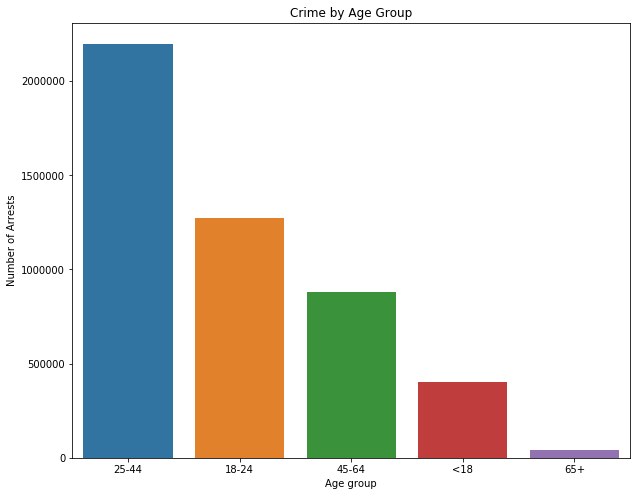

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=crimes_by_age.index, y = crimes_by_age )
plt.title("Crime by Age Group")
plt.xlabel("Age group")
plt.ylabel("Number of Arrests")

In [10]:
crimes_by_city = df.city.value_counts().sort_values(ascending = False)[:10]

Text(0, 0.5, 'Number of Arrests')

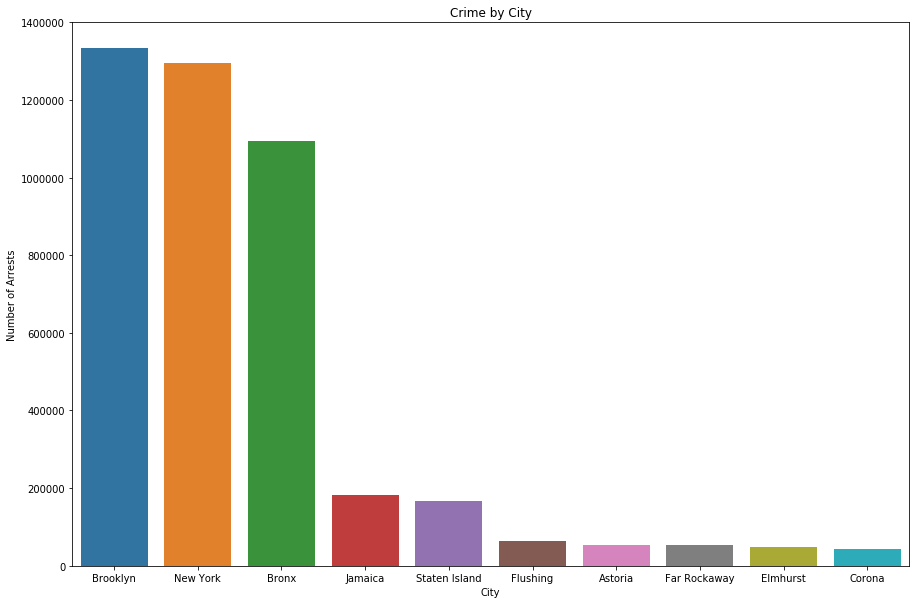

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x=crimes_by_city.index, y = crimes_by_city )
plt.title("Crime by City")
plt.xlabel("City")
plt.ylabel("Number of Arrests")

In [12]:
df['Year'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[-1]))

In [13]:
df['Month'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[0]))

In [14]:
df['Day'] = df.ARREST_DATE.apply(lambda x:np.int(x.split("/")[1]))

In [15]:
crimes_by_year = df.Year.value_counts()

Text(0, 0.5, 'Number of Arrests')

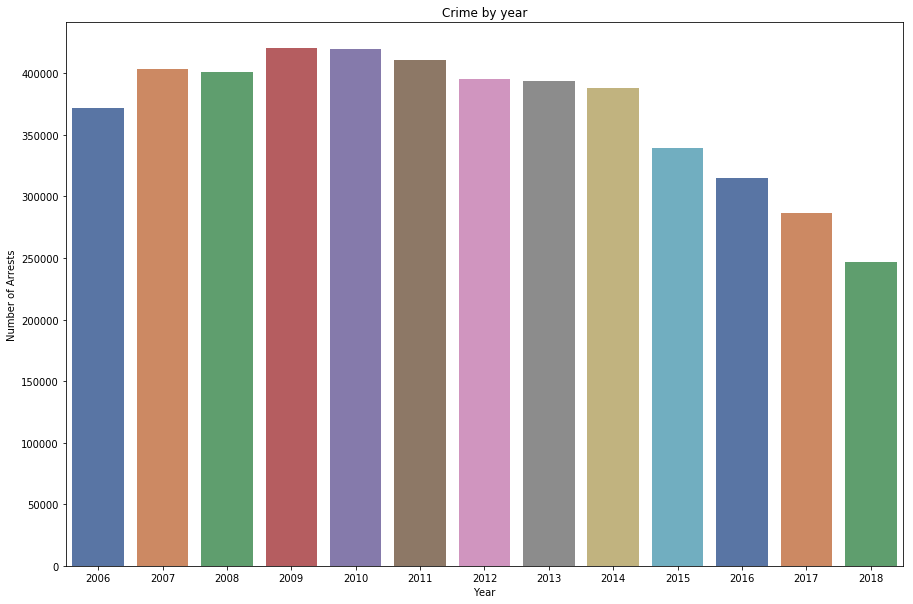

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x=crimes_by_year.index, y = crimes_by_year,palette='deep' )
plt.title("Crime by year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")

In [17]:
df[df.Year == 2018]['ARREST_DATE'].max()

'12/31/2018'

In [18]:
df.Year.max(), df.Year.min()

(2018, 2006)

In [ ]:
arrests_by_month = df.Month.value_counts()

Text(0, 0.5, 'Number of Arrests')

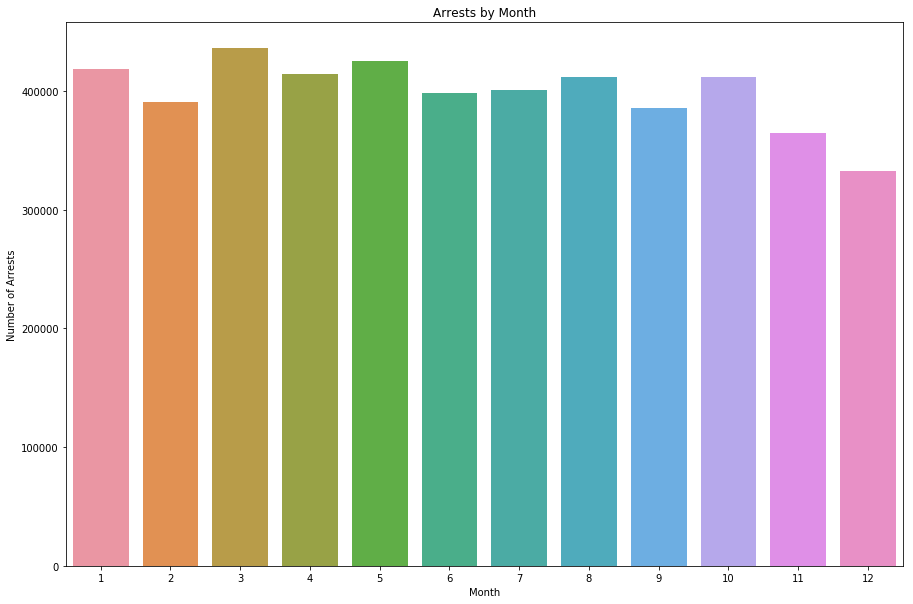

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=arrests_by_month.index, y = arrests_by_month )
plt.title("Arrests by Month")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

In [ ]:
arrests_by_month = arrests_by_month/ arrests_by_month.min()

Text(0, 0.5, 'Number of Arrests')

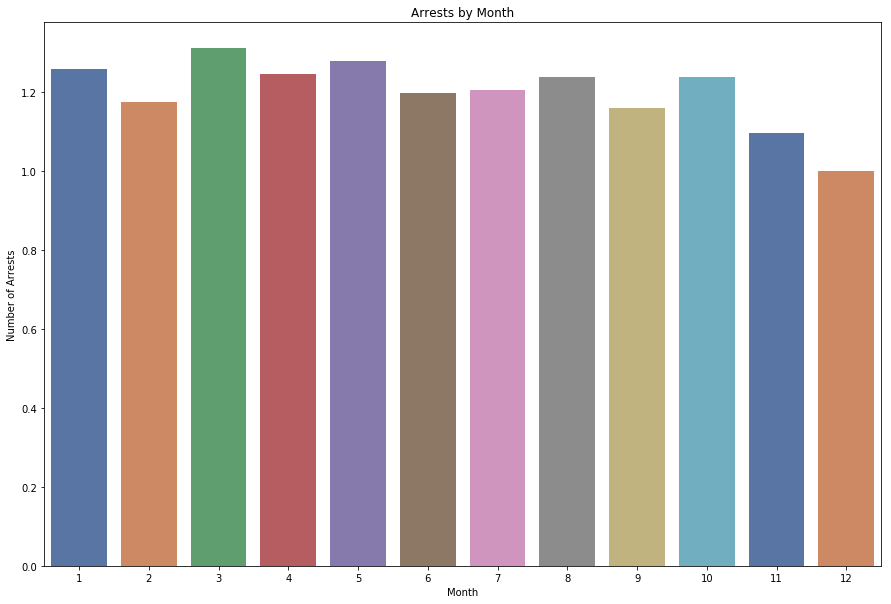

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=arrests_by_month.index, y = arrests_by_month,palette='deep')
plt.title("Arrests by Month")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

In [ ]:
df[(df.Year==2006) & (df.Month == 1)].Day.max()

31

In [ ]:
df[(df.Year==2006) & (df.Month == 1)].Day.min()

1

In [ ]:
date = pd.to_datetime('01-01-2006')

In [ ]:
date

Timestamp('2006-01-01 00:00:00')

In [ ]:
#pd.timedelta_range(start='1-1-2006',end='3-02-2006',freq='1d')

In [ ]:
date+pd.to_timedelta(1,unit='d')

Timestamp('2006-01-02 00:00:00')

In [ ]:


def count_days_in_month(date = None):
    
    print(date)
    day, month, year = None, None, None

    map_days = {}
    next_date = None
    while day!=31 or month!=12 or year!=2018:
    
        try:


            day = date.day

            month = date.month

            year = date.year

            #print(day,month,year)
            map_days[month] = map_days.get(month,0) + 1

            next_date = date + pd.to_timedelta(1.0,unit='d')
            date = next_date 

        except:
            print(next_date)

    
    return map_days
    
    

In [ ]:
#print(map_days[1])

In [ ]:
map_days = count_days_in_month(date = date)

2006-01-01 00:00:00


In [ ]:
per_day_crime = df.Month.value_counts()

In [ ]:
per_day_crime

3     436176
5     425422
1     418911
4     414315
10    412236
8     412110
7     400632
6     398271
2     390476
9     385587
11    364837
12    332886
Name: Month, dtype: int64

In [ ]:
for i in range(1,13):
    per_day_crime[i]/= map_days[1]

In [ ]:
per_day_crime

3     1082
5     1055
1     1039
4     1028
10    1022
8     1022
7      994
6      988
2      968
9      956
11     905
12     826
Name: Month, dtype: int64

Text(0, 0.5, 'Number of Arrests')

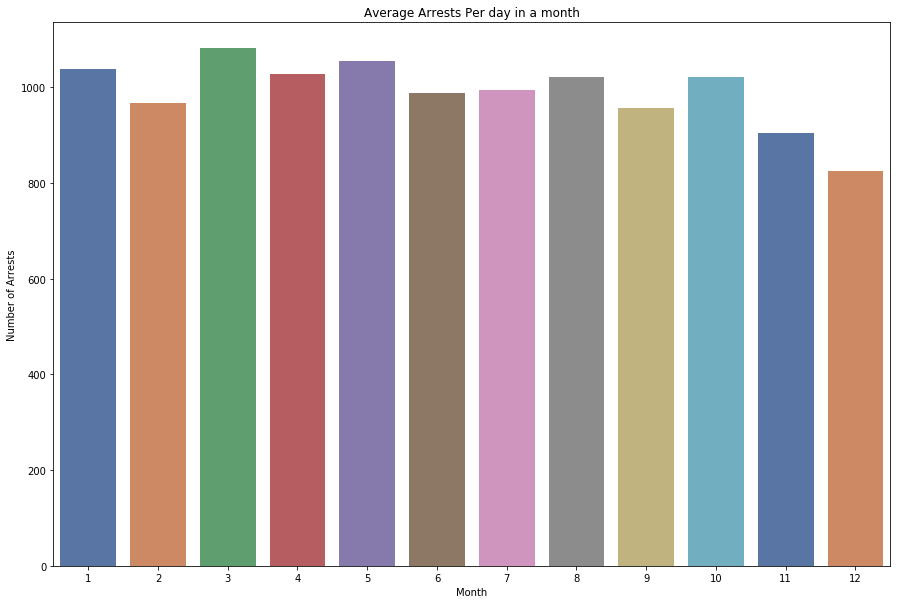

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=per_day_crime.index, y = per_day_crime,palette='deep')
plt.title("Average Arrests Per day in a month")
plt.xlabel("Month")
plt.ylabel("Number of Arrests")

In [ ]:
arrests = df.Year.value_counts().sort_index()

In [ ]:
arrests

2006    371905
2007    403156
2008    401407
2009    420452
2010    419832
2011    410964
2012    395487
2013    393756
2014    387687
2015    339435
2016    314819
2017    286216
2018    246743
Name: Year, dtype: int64

In [ ]:
arrests.shape

(13,)

In [ ]:
sum1 = sum([arrests[x] for x in range(2006,2012)])
sum2 = sum([arrests[x] for x in range(2012,2018)])

print(sum1,sum2)

2427716 2117400


Text(0, 0.5, 'Arrests')

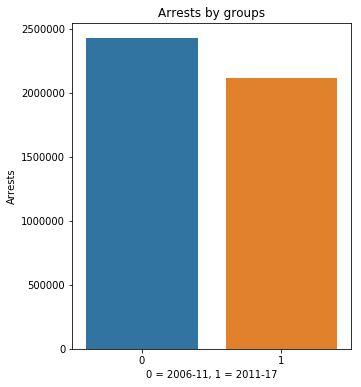

In [ ]:
plt.figure(figsize=(5,6))
sns.barplot(x=[0,1],y = [sum1,sum2])
plt.title("Arrests by groups")
plt.xlabel("0 = 2006-11, 1 = 2011-17")
plt.ylabel("Arrests")

In [ ]:
grouped_sums = []
for i in range(2006,2019,2):
    grouped_sums.append(arrests.get(i)+arrests.get(i,0))
    
len(grouped_sums)

7

Text(0, 0.5, 'Arrests')

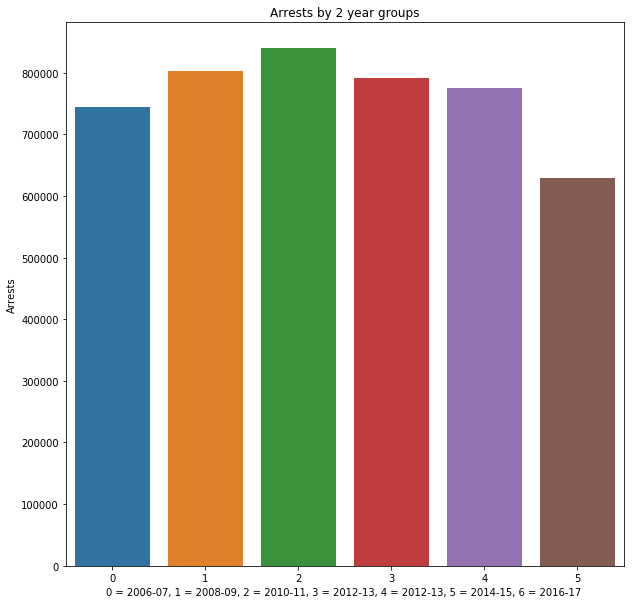

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=[0,1,2,3,4,5],y = grouped_sums[:-1])
plt.title("Arrests by 2 year groups")
plt.xlabel("0 = 2006-07, 1 = 2008-09, 2 = 2010-11, 3 = 2012-13, 4 = 2012-13, 5 = 2014-15, 6 = 2016-17 ")
plt.ylabel("Arrests")

In [ ]:
df_brooklyn = df[df.city=='Brooklyn']

In [ ]:
df_brooklyn.shape

(1333369, 23)

In [ ]:
arrests_brooklyn = df_brooklyn.Year.value_counts()

In [ ]:
grouped_sums_brooklyn = []
for i in range(2006,2019,2):
    grouped_sums_brooklyn.append(arrests_brooklyn.get(i)+arrests_brooklyn.get(i,0))

Text(0, 0.5, 'Arrests')

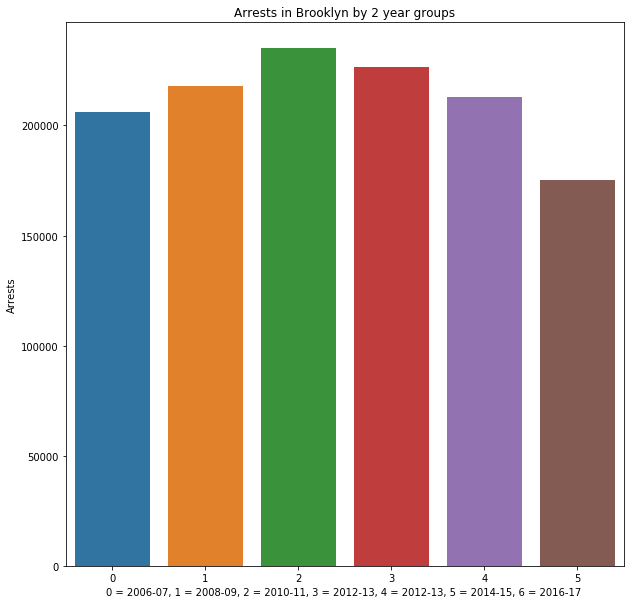

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=[0,1,2,3,4,5],y = grouped_sums_brooklyn[:-1])
plt.title("Arrests in Brooklyn by 2 year groups")
plt.xlabel("0 = 2006-07, 1 = 2008-09, 2 = 2010-11, 3 = 2012-13, 4 = 2012-13, 5 = 2014-15, 6 = 2016-17 ")
plt.ylabel("Arrests")

In [ ]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'zipcode', 'city', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
arrest_by_race = df.PERP_RACE.value_counts().sort_values()

In [ ]:
arrest_by_race 

OTHER                                1363
AMERICAN INDIAN/ALASKAN NATIVE      10434
UNKNOWN                             48822
ASIAN / PACIFIC ISLANDER           192823
BLACK HISPANIC                     383715
WHITE                              578492
WHITE HISPANIC                    1247861
BLACK                             2328349
Name: PERP_RACE, dtype: int64

In [ ]:
arrest_by_race = arrest_by_race[~arrest_by_race.index.isin(["OTHER","UNKNOWN"])]

In [ ]:
arrest_by_race

AMERICAN INDIAN/ALASKAN NATIVE      10434
ASIAN / PACIFIC ISLANDER           192823
BLACK HISPANIC                     383715
WHITE                              578492
WHITE HISPANIC                    1247861
BLACK                             2328349
Name: PERP_RACE, dtype: int64

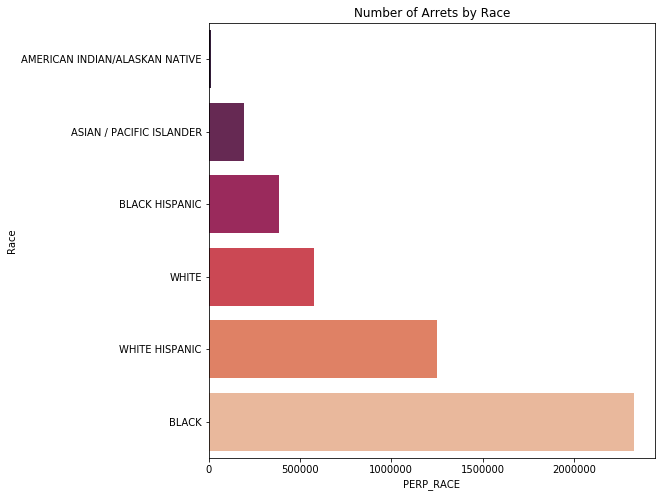

In [ ]:
plt.figure(figsize = (8,8))

plt.xlabel("Number of Arrests")
plt.title('Number of Arrets by Race')
plt.ylabel('Race')
sns.barplot(x = arrest_by_race, y = arrest_by_race.index,palette='rocket')

In [ ]:
arrests_by_sex = df.PERP_SEX.value_counts()

In [ ]:
arrests_by_sex

M    3990514
F     801345
Name: PERP_SEX, dtype: int64

Text(0, 0.5, 'Arrests')

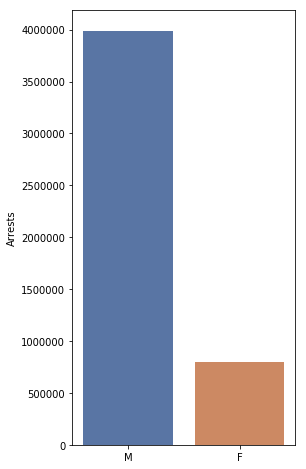

In [ ]:
plt.figure(figsize = (4,8))
sns.barplot(y = arrests_by_sex, x = arrests_by_sex.index,palette='deep')
plt.ylabel("Arrests")

In [ ]:
arrests_white = df[df.PERP_RACE == 'BLACK']
arrests_black = df[df.PERP_RACE == "WHITE"]
arrests_hispanic = df[df.PERP_SEX == "HISPANIC"]

In [ ]:
arrests_white.AGE_GROUP.value_counts().sort_values(ascending=False)[:5]

25-44    1010260
18-24     615195
45-64     466471
<18       219733
65+        16595
Name: AGE_GROUP, dtype: int64

In [ ]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'zipcode', 'city', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
x = df[['AGE_GROUP','PERP_RACE']]

In [ ]:
 start_time = time.time()

x.groupby(by='AGE_GROUP').agg({'PERP_RACE':sum})

print(time.time()-start_time)

In [94]:
sns.barplot(data = x.AGE_GROUP)

ValueError: could not convert string to float: '25-44'